In [3]:
%load_ext autoreload
%autoreload 2

import datetime
import os
import numpy as np
import matplotlib.pyplot as plt

import casadi as cas


import car_plotting as cp

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
cp.plot_cars(x, x, x)

TypeError: plot_cars() missing 1 required positional argument: 'folder'

In [ ]:
arr_img = plt.imread('red_car.png', format='png')
imagebox = OffsetImage(arr_img, zoom=1.0) #this zoom is to scale L=1            
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, (X, Y),frameon=False)
ax.add_artist(ab)   

In [ ]:
CIRCLE = False
if CIRCLE:
        vid_fname = folder + subdir_name + 'circle.mp4'
else:
    vid_fname = folder + subdir_name + 'car.mp4'    
if os.path.exists(vid_fname):
    os.remove(vid_fname)
cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
os.system(cmd)
print('Saving video to: {}'.format(vid_fname))

# Play the video
video = io.open(vid_fname, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [ ]:
optional_suffix = "_plotting"
subdir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + optional_suffix
folder = "results/" + subdir_name + "/"
os.makedirs(folder)
os.makedirs(folder+"imgs/")
print(folder)

# Vehicle Dynamics $\frac{d}{dt} \vec{x} = f(\vec{x}, \vec{u})$

In [4]:
X = cas.MX.sym('X')
Y = cas.MX.sym('Y')
Phi = cas.MX.sym('Phi')
Delta = cas.MX.sym('Delta')
V = cas.MX.sym('V')
s = cas.MX.sym('s')

delta_u = cas.MX.sym('delta_u')
v_u = cas.MX.sym('v_u')
x = cas.vertcat(X, Y, Phi, Delta, V, s)
u = cas.vertcat(delta_u, v_u)

L = 1.0
ode = cas.vertcat(V * cas.cos(Phi),
                V * cas.sin(Phi),
                V * cas.tan(Delta) / L,
                delta_u,
                v_u,
                V)

f = cas.Function('f',[x,u],[ode],['x','u'],['ode'])

In [7]:
N=500
speeding_amb_u = np.zeros((2,N))
speeding_amb_u[1,:10] = np.ones((1,10)) * 3.999

x = np.zeros((6,N+1))
x1 = np.zeros((6,N+1))
xamb = np.zeros((6,N+1))
u0 = np.zeros((2,N))
u0[0,:10] = np.ones((1,10)) * np.pi/5
u0[1,:10] = np.ones((1,10)) * 3.999

u1 = np.zeros((2,N))
u1[0,:10] = np.ones((1,10)) * -np.pi/5
u1[1,:10] = np.ones((1,10)) * 3.999

x[:,0] = x0
x1[:,0] = x0_2
xamb[:,0] = x0_amb
for t in range(N):
    x[:,t+1:t+2] = F(x[:,t],u0[:,t])
    x1[:,t+1:t+2] = F(x1[:,t],u1[:,t])
    xamb[:,t+1:t+2] = F(xamb[:,t],speeding_amb_u[:,t])

NameError: name 'x0' is not defined

NameError: name 'x1' is not defined

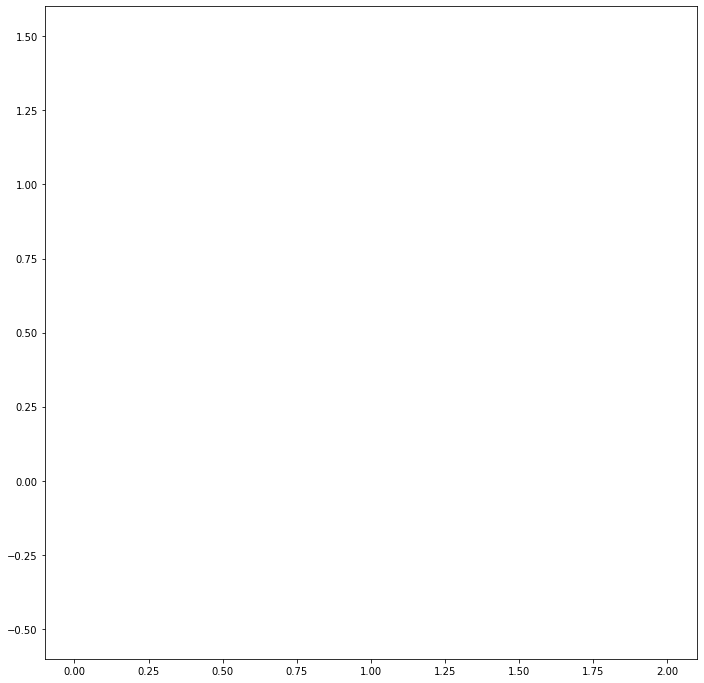

In [6]:

figwidth_in=12
fig, ax = plt.subplots(figsize=(figwidth_in,figwidth_in))
ax.set_xlim([0, 2])
ax.set_ylim([-.5, 1.5])
ax.axis('square')
x = x1[:,0]
x[0] = 0.5
x[1] = 0
plt.grid()
fig, ax = get_frame(x, ax)
fig, ax = get_frame(x, ax, True)

In [ ]:
figwidth_in=12
fig1, ax1 = plt.subplots(figsize=(figwidth_in,figwidth_in))
ax1.set_xlim([0, 2])
ax1.set_ylim([-.5, 1.5])
ax1.axis('square')
x2 = x1[:,0]
x2[0] = 0.5
x2[1] = 0
plt.grid()
fig1, ax1 = get_frame(x2, ax1, True)
fig1, ax1 = get_frame(x2, ax1)

In [ ]:
def get_frame(x, ax=None, amb=False, min_distance=-1, circle=False, L=1.0):
    if ax is None:
        fig, ax = plt.subplots(figsize=(figwidth_in,figwidth_in))
    else:
        fig = ax.get_figure()

    X, Y, Phi, Delta, V, S = x.flatten()
    if not amb:
        arr_img = plt.imread('red_car.png', format='png')
    else:
        arr_img = plt.imread('ambulance.png', format='png')
    degree = np.rad2deg(Phi)
    xy = (X, Y)

    rotated_img = ndimage.rotate(arr_img, degree)
    
    window_width = ax.get_xlim()[1] - ax.get_xlim()[0]
    window_height = ax.get_ylim()[1] - ax.get_ylim()[0]
    figwidth_in = fig.get_size_inches()[0]
    dpi = fig.get_dpi()
    if circle:
        circle_patch = patches.Circle(xy, radius=min_distance/2)
        ax.add_patch(circle_patch)
    else:
        if not amb:
            car_width_px = 599
            car_height_px = 310
            zoom_ratio = L/car_width_px * (dpi*figwidth_in)/window_width  * 0.75 #0.8 is a hard coded correction            
        else:
            car_width_px = 1280
            car_height_px = 640
            zoom_ratio = L/car_width_px * (dpi*figwidth_in)/window_width  * 0.75 #0.8 is a hard coded correction             
        imagebox = OffsetImage(rotated_img, zoom=zoom_ratio) #this zoom is to scale L=1            
        imagebox.image.axes = ax
        ab = AnnotationBbox(imagebox, (X, Y),frameon=False)
        ax.add_artist(ab)        
    return fig, ax    

def plot_cars(x1_plot, x2_plot, xamb_plot, folder, x1_desired=None, x2_desired=None, xamb_desired=None, CIRCLES=False, min_dist=-1):
    figsize="Large"
    if figsize == "LARGE":
        figwidth_in=24
    else:
        figwidth_in=6
    fig, ax = plt.subplots(figsize=(figwidth_in,figwidth_in))
    ax.axis('square')
   
    window_width = max(xamb_plot[0,:]) + 1
    window_height = window_width
    xmin, xmax = -1, -1+window_width
    ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
    ax.set_ylim((ymin, ymax))
    ax.set_xlim((xmin, xmax)) 
    N = x1_plot.shape[1]
    for k in range(N):
        if CIRCLES:
            fig, ax = ego_car.get_frame(x1_plot[:,k], ax,False,min_dist,True)
            fig, ax = ego_car.get_frame(x2_plot[:,k], ax,False,min_dist,True)
            fig, ax = ego_car.get_frame(xamb_plot[:,k], ax, False,min_dist,True)
        else:
            fig, ax = ego_car.get_frame(x1_plot[:,k],None,False,min_dist,False)
            fig, ax = ego_car.get_frame(x2_plot[:,k], ax,False,min_dist,False)
            fig, ax = ego_car.get_frame(xamb_plot[:,k], ax, True,min_dist,False)        

        ax.plot(x_des[0,:], x_des[1,:], '--')
        ax.plot(x2_des[0,:], x2_des[1,:], '--')        
        ax.plot(xamb_des[0,:], xamb_des[1,:], '--')        
        ax.set_ylim((ymin, ymax))
        ax.set_xlim((xmin, xmax))   
        fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
        plt.close(fig)     

def convert_to_video(folder, subdir_name, play_video=True, CIRCLES=False):
    if CIRCLES:
        vid_fname = folder + subdir_name + 'circle.mp4'
    else:
        vid_fname = folder + subdir_name + 'car.mp4'    
    if os.path.exists(vid_fname):
        os.remove(vid_fname)
    cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
    os.system(cmd)
    print('Saving video to: {}'.format(vid_fname))
    
    # Play the video
    if play_video:
        video = io.open(vid_fname, 'r+b').read()
        encoded = base64.b64encode(video)
        HTML(data='''<video alt="test" controls>
                        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                     </video>'''.format(encoded.decode('ascii')))

## Warm Start

In [ ]:
car1_v_cost = car1_s_cost
car2_v_cost = car2_s_cost
amb_v_cost = amb_s_cost

In [ ]:
car1_sub_costs = [car1_u_delta_cost, car1_u_v_cost, k_lat1*car1_lat_cost, k_lon1*car1_lon_cost, k_phi1*car1_phi_cost, k_phid1*phid1_cost, q_v*car1_v_cost] 
car1_sub_costs_labels = ['udel1', 'uv1', 'elat1', 'lon1', 'ephi1', 'v1']
plt.bar(range(len(car1_sub_costs)), [sol.value(c) for c in car1_sub_costs])
plt.xticks(range(len(car1_sub_costs)), car1_sub_costs_labels,rotation=45)
plt.title('Car 1')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")
plt.show()

car2_sub_costs = [car2_u_delta_cost, car2_u_v_cost, 10*car2_lat_cost, 10*car2_lon_cost, k_phi2*car2_phi_cost, k_phid2*phid2_cost, q_v*car2_v_cost] 
car2_sub_costs_labels = ['udel2', 'uv2', 'elat2', 'lon2', 'ephi2', 'v2']
plt.bar(range(len(car2_sub_costs)), [sol.value(c) for c in car2_sub_costs])
plt.xticks(range(len(car2_sub_costs)), car2_sub_costs_labels,rotation=45)
plt.title('Car 2')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")
plt.show()

amb_sub_costs = [amb_u_delta_cost, amb_u_v_cost, 10*amb_lat_cost, 10*amb_lon_cost,k_phiamb*amb_phi_cost, k_phidamb*phidamb_cost, q_v*amb_v_cost] 
amb_sub_costs_labels = ['udelA', 'uvA', 'elatA', 'lonA', 'ephiA', 'vA']
plt.bar(range(len(amb_sub_costs)), [sol.value(c) for c in amb_sub_costs])
plt.xticks(range(len(amb_sub_costs)), amb_sub_costs_labels,rotation=45)

plt.title('Amb')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")
plt.show()

all_costs = [0.1*c for c in car1_sub_costs] + [0.1 for c in car2_sub_costs] + [10*c for c in amb_sub_costs]
all_labels = car1_sub_costs_labels + car2_sub_costs_labels + amb_sub_costs_labels
plt.bar(range(len(all_costs)), [sol.value(c) for c in all_costs])
plt.xticks(range(len(all_labels)), all_labels,rotation=90)
plt.title('All Cars')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")

## Optimization

In [ ]:
## Best response for vehicle 1
opti = cas.Opti()
n_ctrl = 2
n_state = 6

#Variables
x_opt = opti.variable(n_state, N+1) # initialize X for each car that we will optimize
u_opt = opti.variable(n_ctrl, N)



# These are now parameters!!
x2_opt = opti.parameter(n_state, N+1)
xamb_opt = opti.parameter(n_state, N+1)
u2_opt = opti.parameter(n_ctrl, N)
uamb_opt = opti.parameter(n_ctrl, N)

p = opti.parameter(n_state, 1) #this will be the initial state
p2 = opti.parameter(n_state, 1)
pamb = opti.parameter(n_state, 1)


x_desired = opti.variable(3, N+1)
x2_desired = opti.variable(3, N+1)
xamb_desired = opti.variable(3, N+1)

#### Costs

car1_u_delta_cost = 10 * cas.sumsqr(u_opt[0,:])
car1_u_v_cost = 1 * cas.sumsqr(u_opt[1,:])

car1_lat_cost = np.sum([(-cas.sin(x_desired[2,k]) * (x_opt[0,k]-x_desired[0,k]) + 
            cas.cos(x_desired[2,k]) * (x_opt[1,k]-x_desired[1,k]))**2
           for k in range(N+1)])
car1_lon_cost = np.sum([(cas.cos(x_desired[2,k]) * (x_opt[0,k]-x_desired[0,k]) + 
            cas.sin(x_desired[2,k]) * (x_opt[1,k]-x_desired[1,k]))**2
           for k in range(N+1)]) 
car1_phi_cost = cas.sumsqr(x_desired[2,:]-x_opt[2,:]) 
car1_v_cost = cas.sumsqr(x_opt[4,:])   
phid_1 = x_opt[4,:] * cas.tan(x_opt[3,:]) / L
phid1_cost = cas.sumsqr(phid_1)

k_lat1 = 10
k_lon1 = 10
k_phid1 = 1.0

car1_costs = (car1_u_delta_cost + car1_u_v_cost + 
    k_lat1*car1_lat_cost + k_lon1*car1_lon_cost + car1_phi_cost + 
              k_phid1 * phid1_cost +
             q_v*car1_v_cost)


car2_u_delta_cost = 10 * cas.sumsqr(u2_opt[0,:])
car2_u_v_cost = 1 * cas.sumsqr(u2_opt[1,:])

car2_lat_cost = np.sum([(-cas.sin(x2_desired[2,k]) * (x2_opt[0,k]-x2_desired[0,k]) + 
            cas.cos(x2_desired[2,k]) * (x2_opt[1,k]-x2_desired[1,k]))**2
           for k in range(N+1)])
car2_lon_cost = np.sum([(cas.cos(x2_desired[2,k]) * (x2_opt[0,k]-x2_desired[0,k]) + 
            cas.sin(x2_desired[2,k]) * (x2_opt[1,k]-x2_desired[1,k]))**2
           for k in range(N+1)]) 
car2_phi_cost = cas.sumsqr(x2_desired[2,:]-x2_opt[2,:]) 
car2_v_cost = cas.sumsqr(x2_opt[4,:])   
phid_2 = x2_opt[4,:] * cas.tan(x2_opt[3,:]) / L
phid2_cost =cas.sumsqr(phid_2)    


k_lat2 = 10
k_lon2 = 10    
k_phid2 = 1.0

car2_costs = (car2_u_delta_cost + car2_u_v_cost + 
    k_lat2*car2_lat_cost + k_lon2*car2_lon_cost + car2_phi_cost + 
              k_phid2*phid2_cost + q_v*car2_v_cost)    

R_k = 1*R_k

#     amb_u_v_cost = np.sum([cas.transpose(uamb_opt[:,k]) @ R_k @ uamb_opt[:,k] for k in range(N)])

amb_u_delta_cost = 10 * cas.sumsqr(uamb_opt[0,:])
amb_u_v_cost = 0.1 * cas.sumsqr(uamb_opt[1,:])

amb_lat_cost = np.sum([(-cas.sin(xamb_desired[2,k]) * (xamb_opt[0,k]-xamb_desired[0,k]) + 
            cas.cos(xamb_desired[2,k]) * (xamb_opt[1,k]-xamb_desired[1,k]))**2
           for k in range(N+1)])


amb_lon_cost = np.sum([(cas.cos(xamb_desired[2,k]) * (xamb_opt[0,k]-xamb_desired[0,k]) + 
            cas.sin(xamb_desired[2,k]) * (xamb_opt[1,k]-xamb_desired[1,k]))**2
           for k in range(N+1)]) 

amb_phi_cost = cas.sumsqr(xamb_desired[2,:]-xamb_opt[2,:]) 
amb_v_cost = cas.sumsqr(xamb_opt[4,:])  

phid_amb= xamb_opt[4,:] * cas.tan(xamb_opt[3,:]) / L
phidamb_cost =cas.sumsqr(phid_amb)   

k_latamb = 20
k_lonamb = 10        
k_phidamb = 1.0
amb_costs = (amb_u_delta_cost + amb_u_v_cost + 
             k_latamb*amb_lat_cost + k_lonamb*amb_lon_cost + amb_phi_cost + 
             k_phidamb * phidamb_cost + q_v*amb_v_cost
            )


theta_1 = np.pi/4
theta_2 = np.pi/4
theta_amb = 0
######## optimization  ##################################
opti.minimize(np.cos(theta_1)*car1_costs + np.sin(theta_1)*amb_costs)    
##########################################################



#constraints

for k in range(N):
    opti.subject_to( x_opt[:, k+1] == F(x_opt[:, k], u_opt[:, k]))

for k in range(N+1):
    opti.subject_to( x_desired[:, k] == fd(x_opt[-1, k]) ) #This should be the trajectory dynamic constraint        


opti.subject_to(opti.bounded(-np.pi/6, u_opt[0,:], np.pi/6))
opti.subject_to(opti.bounded(-4, u_opt[1,:], 4)) # 0-60 around 4 m/s^2
v_max = 10
opti.subject_to(opti.bounded(0, x_opt[4,:],v_max))    
opti.subject_to(x_opt[:,0] == p)

#     min_dist = 0.6
for k in range(N+1):
    opti.subject_to( cas.sumsqr(x_opt[0:2,k] - x2_opt[0:2,k]) > min_dist**2 )
    opti.subject_to( cas.sumsqr(x_opt[0:2,k] - xamb_opt[0:2,k]) > min_dist**2 )

# constraints to help out
opti.subject_to( opti.bounded(-1, x_opt[0,:], 30) )
opti.subject_to( opti.bounded(-10, x_opt[1,:], 10) )
opti.subject_to( opti.bounded(-np.pi/2, x_opt[2,:], np.pi/4) )


# constrain the lane deviations to prevent wacky solutions
#     opti.subject_to( opti.bounded(-5, x_opt[0,:] - x_desired[0,:], 5))
#     opti.subject_to( opti.bounded(-5, x2_opt[0,:] - x2_desired[0,:], 5))
opti.subject_to( opti.bounded(-5, xamb_opt[0,:] - xamb_desired[0,:], 5))
opti.subject_to( opti.bounded(-10, x_opt[1,:] - x_desired[1,:], 10))

opti.solver('ipopt',{'warn_initial_bounds':True},{'print_level':0})

opti.set_value(p,x0)
opti.set_value(p2,x0_2)
opti.set_value(pamb,x0_amb)     




In [ ]:
opti2 = cas.Opti()
n_ctrl = 2
n_state = 6

#Variables
x2_opt2 = opti2.variable(n_state, N+1)
u2_opt2 = opti2.variable(n_ctrl, N)

### Agent 2 has these as parameters!!!
x_opt2 = opti2.parameter(n_state, N+1) # initialize X for each car that we will opti2mize
xamb_opt2 = opti2.parameter(n_state, N+1)
u_opt2 = opti2.parameter(n_ctrl, N)
uamb_opt2 = opti2.parameter(n_ctrl, N)

p_2 = opti2.parameter(n_state, 1) #this will be the initial state
p2_2 = opti2.parameter(n_state, 1)
pamb_2 = opti2.parameter(n_state, 1)

x_desired_2 = opti2.variable(3, N+1)
x2_desired_2 = opti2.variable(3, N+1)
xamb_desired_2 = opti2.variable(3, N+1)

#### Costs
car1_u_delta_cost_2 = 10 * cas.sumsqr(u_opt2[0,:])
car1_u_v_cost_2 = 1 * cas.sumsqr(u_opt2[1,:])
car1_lat_cost_2 = np.sum([(-cas.sin(x_desired_2[2,k]) * (x_opt2[0,k]-x_desired_2[0,k]) + 
            cas.cos(x_desired_2[2,k]) * (x_opt2[1,k]-x_desired_2[1,k]))**2
           for k in range(N+1)])
car1_lon_cost_2 = np.sum([(cas.cos(x_desired_2[2,k]) * (x_opt2[0,k]-x_desired_2[0,k]) + 
            cas.sin(x_desired_2[2,k]) * (x_opt2[1,k]-x_desired_2[1,k]))**2
           for k in range(N+1)]) 
car1_phi_cost_2 = cas.sumsqr(x_desired_2[2,:]-x_opt2[2,:]) 
car1_v_cost_2 = cas.sumsqr(x_opt2[4,:])   
phid_1_2 = x_opt2[4,:] * cas.tan(x_opt2[3,:]) / L
phid1_cost_2 = cas.sumsqr(phid_1_2)

k_lat1_2 = 10
k_lon1_2 = 10
k_phid1_2 = 1.0

car1_costs_2 = (car1_u_delta_cost_2 + car1_u_v_cost_2 + 
    k_lat1_2*car1_lat_cost_2 + k_lon1_2*car1_lon_cost_2 + car1_phi_cost_2 + 
              k_phid1_2 * phid1_cost_2 +
             q_v*car1_v_cost_2)


car2_u_delta_cost_2 = 10 * cas.sumsqr(u2_opt2[0,:])
car2_u_v_cost_2 = 1 * cas.sumsqr(u2_opt2[1,:])
car2_lat_cost_2 = np.sum([(-cas.sin(x2_desired_2[2,k]) * (x2_opt2[0,k]-x2_desired_2[0,k]) + 
            cas.cos(x2_desired_2[2,k]) * (x2_opt2[1,k]-x2_desired_2[1,k]))**2
           for k in range(N+1)])
car2_lon_cost_2 = np.sum([(cas.cos(x2_desired_2[2,k]) * (x2_opt2[0,k]-x2_desired_2[0,k]) + 
            cas.sin(x2_desired_2[2,k]) * (x2_opt2[1,k]-x2_desired_2[1,k]))**2
           for k in range(N+1)]) 
car2_phi_cost_2 = cas.sumsqr(x2_desired_2[2,:]-x2_opt2[2,:]) 
car2_v_cost_2 = cas.sumsqr(x2_opt2[4,:])   
phid_2_2 = x2_opt2[4,:] * cas.tan(x2_opt2[3,:]) / L
phid2_cost_2 =cas.sumsqr(phid_2_2)    

k_lat2_2 = 10
k_lon2_2 = 10    
k_phid2_2 = 1.0

car2_costs_2 = (car2_u_delta_cost_2 + car2_u_v_cost_2 + 
    k_lat2*car2_lat_cost_2 + k_lon2*car2_lon_cost_2 + car2_phi_cost_2 + 
              k_phid2_2*phid2_cost_2 + q_v*car2_v_cost_2)    

R_k_2 = 1*R_k

#     amb_u_v_cost = np.sum([cas.transpose(uamb_opt2[:,k]) @ R_k @ uamb_opt2[:,k] for k in range(N)])

amb_u_delta_cost_2 = 10 * cas.sumsqr(uamb_opt2[0,:])
amb_u_v_cost_2 = 0.1 * cas.sumsqr(uamb_opt2[1,:])
amb_lat_cost_2 = np.sum([(-cas.sin(xamb_desired_2[2,k]) * (xamb_opt2[0,k]-xamb_desired_2[0,k]) + 
            cas.cos(xamb_desired_2[2,k]) * (xamb_opt2[1,k]-xamb_desired_2[1,k]))**2
           for k in range(N+1)])
amb_lon_cost_2 = np.sum([(cas.cos(xamb_desired_2[2,k]) * (xamb_opt2[0,k]-xamb_desired_2[0,k]) + 
            cas.sin(xamb_desired_2[2,k]) * (xamb_opt2[1,k]-xamb_desired_2[1,k]))**2
           for k in range(N+1)]) 
amb_phi_cost_2 = cas.sumsqr(xamb_desired_2[2,:]-xamb_opt2[2,:]) 
amb_v_cost_2 = cas.sumsqr(xamb_opt2[4,:])  
phid_amb_2 = xamb_opt2[4,:] * cas.tan(xamb_opt2[3,:]) / L
phidamb_cost_2 =cas.sumsqr(phid_amb_2)   

k_latamb_2 = 20
k_lonamb_2 = 10        
k_phidamb_2 = 1.0
amb_costs_2 = (amb_u_delta_cost_2 + amb_u_v_cost_2 + 
             k_latamb_2*amb_lat_cost_2 + k_lonamb_2*amb_lon_cost_2 + amb_phi_cost_2 + 
             k_phidamb_2 * phidamb_cost_2 + q_v*amb_v_cost_2
            )

theta_2 = np.pi/4
######## opti2mization  ##################################
opti2.minimize(np.cos(theta_2)*car2_costs_2 + np.sin(theta_2)*amb_costs_2)    
########################################################
#constraints

#Just repeat constraints for x2
for k in range(N):
    opti2.subject_to( x2_opt2[:, k+1] == F(x2_opt2[:, k], u2_opt2[:, k]))
for k in range(N+1):
    opti2.subject_to( x2_desired_2[:, k] == fd(x2_opt2[-1, k]) ) #This should be the trajectory dynamic constraint             


opti2.subject_to(opti2.bounded(-np.pi/6, u2_opt2[0,:], np.pi/6))
opti2.subject_to(opti2.bounded(-4, u2_opt2[1,:], 4))
v_max = 10
opti2.subject_to(opti2.bounded(0, x2_opt2[4,:],v_max))    
opti2.subject_to(x2_opt2[:,0] == p2_2)

#     min_dist = 0.6
for k in range(N+1):
    opti2.subject_to( cas.sumsqr(x_opt2[0:2,k] - x2_opt2[0:2,k]) > min_dist**2 )
    opti2.subject_to( cas.sumsqr(x2_opt2[0:2,k] - xamb_opt2[0:2,k]) > min_dist**2 )




# constraints to help out
opti2.subject_to( opti2.bounded(-1, x2_opt2[0,:], 30) )
opti2.subject_to( opti2.bounded(-10, x2_opt2[1,:], 10) )
opti2.subject_to( opti2.bounded(-np.pi/4, x2_opt2[2,:], np.pi/4) )

# constrain the lane deviations to prevent wacky solutions
#     opti2.subject_to( opti2.bounded(-5, x_opt2[0,:] - x_desired_2[0,:], 5))
#     opti2.subject_to( opti2.bounded(-5, x2_opt2[0,:] - x2_desired_2[0,:], 5))
opti2.subject_to( opti2.bounded(-10, x2_opt2[1,:] - x2_desired_2[1,:], 10))


opti2.solver('ipopt',{'warn_initial_bounds':True},{'print_level':10})

opti2.set_value(p_2,x0)
opti2.set_value(p2_2,x0_2)
opti2.set_value(pamb_2,x0_amb)         

### Ambulance Optimization

In [ ]:
opti3 = cas.Opti()
n_ctrl = 2
n_state = 6

#Variables
xamb_opt3 = opti3.variable(n_state, N+1)
uamb_opt3 = opti3.variable(n_ctrl, N)

### Agent 2 has these as parameters!!!
x_opt3 = opti3.parameter(n_state, N+1) # initialize X for each car that we will opti3mize
x2_opt3 = opti3.parameter(n_state, N+1)
u_opt3 = opti3.parameter(n_ctrl, N)
u2_opt3 = opti3.parameter(n_ctrl, N)

p_3 = opti3.parameter(n_state, 1) #this will be the initial state
p2_3 = opti3.parameter(n_state, 1)
pamb_3 = opti3.parameter(n_state, 1)

x_desired_3 = opti3.variable(3, N+1)
x2_desired_3 = opti3.variable(3, N+1)
xamb_desired_3 = opti3.variable(3, N+1)

#### Costs
amb_u_delta_cost_3 = 10 * cas.sumsqr(uamb_opt3[0,:])
amb_u_v_cost_3 = 0.1 * cas.sumsqr(uamb_opt3[1,:])
amb_lat_cost_3 = np.sum([(-cas.sin(xamb_desired_3[2,k]) * (xamb_opt3[0,k]-xamb_desired_3[0,k]) + 
            cas.cos(xamb_desired_3[2,k]) * (xamb_opt3[1,k]-xamb_desired_3[1,k]))**2
           for k in range(N+1)])
amb_lon_cost_3 = np.sum([(cas.cos(xamb_desired_3[2,k]) * (xamb_opt3[0,k]-xamb_desired_3[0,k]) + 
            cas.sin(xamb_desired_3[2,k]) * (xamb_opt3[1,k]-xamb_desired_3[1,k]))**2
           for k in range(N+1)]) 
amb_phi_cost_3 = cas.sumsqr(xamb_desired_3[2,:]-xamb_opt3[2,:]) 
amb_v_cost_3 = cas.sumsqr(xamb_opt3[4,:])  
phid_amb_3 = xamb_opt3[4,:] * cas.tan(xamb_opt3[3,:]) / L
phidamb_cost_3 =cas.sumsqr(phid_amb_3)   

k_latamb_3 = 20
k_lonamb_3 = 10        
k_phidamb_3 = 1.0
amb_costs_3 = (amb_u_delta_cost_3 + amb_u_v_cost_3 + 
             k_latamb_3*amb_lat_cost_3 + k_lonamb_3*amb_lon_cost_3 + amb_phi_cost_3 + 
             k_phidamb_3 * phidamb_cost_3 + q_v*amb_v_cost_3
            )

theta_3 = np.pi/4
######## opti3mization  ##################################
opti3.minimize(amb_costs_3)    
########################################################
#constraints

#Just repeat constraints for x2
for k in range(N):
    opti3.subject_to( xamb_opt3[:, k+1] == F(xamb_opt3[:, k], u2_opt3[:, k]))
for k in range(N+1):
    opti3.subject_to( xamb_desired_3[:, k] == fd(xamb_opt3[-1, k]) ) #This should be the trajectory dynamic constraint             


opti3.subject_to(opti3.bounded(-np.pi/6, uamb_opt3[0,:], np.pi/6))
opti3.subject_to(opti3.bounded(-4, uamb_opt3[1,:], 4))
v_max = 10
opti3.subject_to(opti3.bounded(0, xamb_opt3[4,:],v_max))    
opti3.subject_to(xamb_opt3[:,0] == pamb_3)

#     min_dist = 0.6
for k in range(N+1):
    opti3.subject_to( cas.sumsqr(xamb_opt3[0:2,k] - x2_opt3[0:2,k]) > min_dist**2 )
    opti3.subject_to( cas.sumsqr(x_opt3[0:2,k] - xamb_opt3[0:2,k]) > min_dist**2 )




# constraints to help out
opti3.subject_to( opti3.bounded(-1, xamb_opt3[0,:], 30) )
opti3.subject_to( opti3.bounded(-10, xamb_opt3[1,:], 10) )
opti3.subject_to( opti3.bounded(-np.pi/4, xamb_opt3[2,:], np.pi/4) )

# constrain the lane deviations to prevent wacky solutions
opti3.subject_to( opti3.bounded(-10, xamb_opt3[1,:] - xamb_desired_3[1,:], 10))


opti3.solver('ipopt',{'warn_initial_bounds':True},{'print_level':5})

opti3.set_value(p_3,x0)
opti3.set_value(p2_3,x0_2)
opti3.set_value(pamb_3,x0_amb)         

# Best Response, V1

In [ ]:
opti.set_value(x2_opt, x2_warm)
opti.set_value(xamb_opt, xamb_warm)
opti.set_value(u2_opt, u2_warm)
opti.set_value(uamb_opt, uamb_warm)

opti.set_initial(x_opt, x_warm)
opti.set_initial(u_opt, u_warm)

In [ ]:
sol = opti.solve()

In [ ]:
x1_1 = opti.debug.value(x_opt)
x2_1 = opti.debug.value(x2_opt)
xamb_1 = opti.debug.value(xamb_opt)

x_des = opti.debug.value(x_desired)
# x2_des = opti.debug.value(x2_desired)

In [ ]:
for k in range(N+1):

    fig, ax = ego_car.get_frame(x1_1[:,k])
    fig, ax = ego_car.get_frame(x2_1[:,k], ax)
    fig, ax = ego_car.get_frame(xamb_1[:,k], ax, amb=True)

    
    ax.plot(x_des[0,:], x_des[1,:], '--')
#     ax.plot(x2_des[0,:], x2_des[1,:], '--')        

    ax = plt.gca()
    window_width = 24
    window_height = window_width
    xmin, xmax = -1, -1+window_width
    ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
    ax.set_ylim((ymin, ymax))
    ax.set_xlim((xmin, xmax))

    fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
    plt.close(fig)     

In [ ]:
vid_fname = folder + 'car1.mp4'
if os.path.exists(vid_fname):
    os.remove(vid_fname)
cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
os.system(cmd)
print('Saving video to: {}'.format(vid_fname))

In [ ]:
video = io.open(vid_fname, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [ ]:
x_warm = sol.value(x_opt)
u_warm = sol.value(u_opt)
x2_warm = sol.value(x2_opt)
u2_warm = sol.value(u2_opt)
xamb_warm = sol.value(xamb_opt)
uamb_warm = sol.value(uamb_opt)

In [ ]:
x_warm = sol.value(x_opt)
u_warm = sol.value(u_opt)

BR_iteration = 0


opti2.set_value(x_opt2, x_warm)
opti2.set_value(u_opt2, u_warm)

opti2.set_value(xamb_opt2, xamb_warm)
opti2.set_value(uamb_opt2, uamb_warm)


# opti2.set_value(xamb_opt2, sol.value(xamb_opt))
# opti2.set_value(uamb_opt2, sol.value(uamb_opt))

opti2.set_initial(x2_opt2, x2_warm)
opti2.set_initial(u2_opt2, u2_warm)
sol2 = opti2.solve()
x2_warm = sol2.value(x2_opt2)
u2_warm = sol2.value(u2_opt2)

opti3.set_value(x_opt3, x_warm)
opti3.set_value(u_opt3, u_warm)

opti3.set_value(x2_opt3, x2_warm)
opti3.set_value(u2_opt3, u2_warm)

opti3.set_initial(xamb_opt3, xamb_warm)
opti3.set_initial(uamb_opt3, uamb_warm)    
sol3 = opti3.solve()
xamb_warm = sol3.value(xamb_opt3)
uamb_warm = sol3.value(uamb_opt3)


opti.set_value(x2_opt, x2_warm)
opti.set_value(xamb_opt, xamb_warm)
opti.set_value(u2_opt, u2_warm)
opti.set_value(uamb_opt, uamb_warm)

opti.set_initial(x_opt, x_warm)
opti.set_initial(u_opt, u_warm)    
sol = opti.solve()
x_warm = sol.value(x_opt)
u_warm = sol.value(u_opt)

# x2_warm = sol.value(x2_opt)
# u2_warm = sol.value(u2_opt)
# xamb_warm = sol.value(xamb_opt)
# uamb_warm = sol.value(uamb_opt)

#     x_des = sol/

for k in range(N+1):

    fig, ax = ego_car.get_frame(x_warm[:,k])
    fig, ax = ego_car.get_frame(x2_warm[:,k], ax)
    fig, ax = ego_car.get_frame(xamb_warm[:,k], ax, amb=True)


#         ax.plot(x_des[0,:], x_des[1,:], '--')
#         ax.plot(x2_des[0,:], x2_des[1,:], '--')        

    ax = plt.gca()
    window_width = 24
    window_height = window_width
    xmin, xmax = -1, -1+window_width
    ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
    ax.set_ylim((ymin, ymax))
    ax.set_xlim((xmin, xmax))

    fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
    plt.close(fig)         

vid_fname = folder + '%02d'%BR_iteration + 'car.mp4'
if os.path.exists(vid_fname):
    os.remove(vid_fname)
cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
os.system(cmd)
print('Saving video to: {}'.format(vid_fname))

In [ ]:
opti3.set_value(x_opt3, x_warm)
opti3.set_value(u_opt3, u_warm)

opti3.set_value(x2_opt3, x2_warm)
opti3.set_value(u2_opt3, u2_warm)

opti3.set_initial(xamb_opt3, xamb_warm)
opti3.set_initial(uamb_opt3, uamb_warm)    
sol3 = opti3.solve()

In [ ]:
x_plot = opti3.debug.value(x_opt3)
x2_plot = opti3.debug.value(x2_opt3)
xamb_plot = opti3.debug.value(xamb_opt3)

BR_iteration = 2


for k in range(N+1):

    fig, ax = ego_car.get_frame(x_plot[:,k],None, False,min_dist,True)
    fig, ax = ego_car.get_frame(x2_plot[:,k], ax, False,min_dist,True)
    fig, ax = ego_car.get_frame(xamb_plot[:,k], ax, False,min_dist,True)


#         ax.plot(x_des[0,:], x_des[1,:], '--')
#         ax.plot(x2_des[0,:], x2_des[1,:], '--')        

    ax = plt.gca()
    window_width = 24
    window_height = window_width
    xmin, xmax = -1, -1+window_width
    ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
    ax.set_ylim((ymin, ymax))
    ax.set_xlim((xmin, xmax))

    fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
    plt.close(fig)         

vid_fname = folder + 'circ'+'%02d'%BR_iteration + 'car.mp4'
if os.path.exists(vid_fname):
    os.remove(vid_fname)
cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
os.system(cmd)
print('Saving video to: {}'.format(vid_fname))


In [ ]:
x_plot = sol2.value(x_opt2)
x2_plot = sol2.value(x2_opt2)
xamb_plot = sol2.value(xamb_opt2)

x2_plot = sol2.value(x2_opt2)
x_plot = x_warm
xamb_plot = xamb_warm





BR_iteration = 1


for k in range(N+1):

    fig, ax = ego_car.get_frame(x_plot[:,k],None, False,min_dist,True)
    fig, ax = ego_car.get_frame(x2_plot[:,k], ax, False,min_dist,True)
    fig, ax = ego_car.get_frame(xamb_plot[:,k], ax, False,min_dist,True)


#         ax.plot(x_des[0,:], x_des[1,:], '--')
#         ax.plot(x2_des[0,:], x2_des[1,:], '--')        

    ax = plt.gca()
    window_width = 24
    window_height = window_width
    xmin, xmax = -1, -1+window_width
    ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
    ax.set_ylim((ymin, ymax))
    ax.set_xlim((xmin, xmax))

    fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
    plt.close(fig)         

vid_fname = folder + 'circ'+'%02d'%BR_iteration + 'car.mp4'
if os.path.exists(vid_fname):
    os.remove(vid_fname)
cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
os.system(cmd)
print('Saving video to: {}'.format(vid_fname))

In [ ]:
for BR_iteration in range(20):
    opti2.set_value(x_opt2, sol.value(x_opt))
    opti2.set_value(u_opt2, sol.value(u_opt))

    opti2.set_value(xamb_opt2, sol.value(xamb_opt))
    opti2.set_value(uamb_opt2, sol.value(uamb_opt))

    opti2.set_initial(x2_opt2, sol.value(x2_opt))
    opti2.set_initial(u2_opt2, sol.value(u2_opt))
    sol2 = opti2.solve()

    opti3.set_value(x_opt3, sol2.value(x_opt2))
    opti3.set_value(u_opt3, sol2.value(u_opt2))

    opti3.set_value(x2_opt3, sol2.value(x2_opt2))
    opti3.set_value(u2_opt3, sol2.value(uamb_opt2))

    opti3.set_initial(xamb_opt3, sol2.value(xamb_opt2))
    opti3.set_initial(uamb_opt3, sol2.value(uamb_opt2))    
    sol3 = opti3.solve()
    
    
    opti.set_value(x2_opt, sol3.value(x2_opt3))
    opti.set_value(xamb_opt, sol3.value(xamb_opt3))
    opti.set_value(u2_opt, sol3.value(u2_opt3))
    opti.set_value(uamb_opt, sol3.value(uamb_opt3))

    opti.set_initial(x_opt, sol3.value(x_opt3))
    opti.set_initial(u_opt, sol3.value(u_opt3))    
    sol = opti.solve()
    
    x_warm = sol.value(x_opt)
    u_warm = sol.value(u_opt)
    x2_warm = sol.value(x2_opt)
    u2_warm = sol.value(u2_opt)
    xamb_warm = sol.value(xamb_opt)
    uamb_warm = sol.value(uamb_opt)

#     x_des = sol/

    for k in range(N+1):

        fig, ax = ego_car.get_frame(x_warm[:,k])
        fig, ax = ego_car.get_frame(x2_warm[:,k], ax)
        fig, ax = ego_car.get_frame(xamb_warm[:,k], ax, amb=True)


#         ax.plot(x_des[0,:], x_des[1,:], '--')
#         ax.plot(x2_des[0,:], x2_des[1,:], '--')        

        ax = plt.gca()
        window_width = 24
        window_height = window_width
        xmin, xmax = -1, -1+window_width
        ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
        ax.set_ylim((ymin, ymax))
        ax.set_xlim((xmin, xmax))

        fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
        plt.close(fig)         

    vid_fname = folder + '%02d'%BR_iteration + 'car.mp4'
    if os.path.exists(vid_fname):
        os.remove(vid_fname)
    cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
    os.system(cmd)
    print('Saving video to: {}'.format(vid_fname))

In [ ]:
for BR_iteration in range(20):        
    vid_fname = folder + '%02d'%BR_iteration + 'car.mp4'
    
    print('Saving video to: {}'.format(vid_fname))

## Best Response V2

In [ ]:
x1 = sol3.value(x_opt3)
x2 = sol3.value(x2_opt3)
xamb = sol3.value(xamb_opt3)
x_des = sol3.value(xamb_desired_3)

for k in range(N+1):

    fig, ax = ego_car.get_frame(x1[:,k])
    fig, ax = ego_car.get_frame(x2[:,k], ax)
    fig, ax = ego_car.get_frame(xamb[:,k], ax, amb=True)

    
    ax.plot(x_des[0,:], x_des[1,:], '--')
#     ax.plot(x2_des[0,:], x2_des[1,:], '--')        

    ax = plt.gca()
    window_width = 24
    window_height = window_width
    xmin, xmax = -1, -1+window_width
    ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
    ax.set_ylim((ymin, ymax))
    ax.set_xlim((xmin, xmax))

    fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
    plt.close(fig)     
    
vid_fname = folder + 'caramb.mp4'
if os.path.exists(vid_fname):
    os.remove(vid_fname)
cmd = 'ffmpeg -r 16 -f image2 -i {}imgs/%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(folder, vid_fname)
os.system(cmd)
print('Saving video to: {}'.format(vid_fname))

In [ ]:
car1_sub_costs = [car1_u_delta_cost, car1_u_v_cost, 10*car1_lat_cost, 10*car1_lon_cost, car1_phi_cost, phid1_cost, q_v*car1_v_cost] 
car1_sub_costs_labels = ['udel1', 'uv1', 'elat1', 'lon1', 'ephi1', 'v1']
plt.bar(range(len(car1_sub_costs)), [sol.value(c) for c in car1_sub_costs])
plt.xticks(range(len(car1_sub_costs)), car1_sub_costs_labels,rotation=45)
plt.title('Car 1')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")
plt.show()

car2_sub_costs = [car2_u_delta_cost, car2_u_v_cost, 10*car2_lat_cost, 10*car2_lon_cost, car2_phi_cost, phid2_cost, q_v*car2_v_cost] 
car2_sub_costs_labels = ['udel2', 'uv2', 'elat2', 'lon2', 'ephi2', 'v2']
plt.bar(range(len(car2_sub_costs)), [sol.value(c) for c in car2_sub_costs])
plt.xticks(range(len(car2_sub_costs)), car2_sub_costs_labels,rotation=45)
plt.title('Car 2')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")
plt.show()

amb_sub_costs = [amb_u_delta_cost, amb_u_v_cost, 10*amb_lat_cost, 10*amb_lon_cost, amb_phi_cost, phidamb_cost, q_v*amb_v_cost] 
amb_sub_costs_labels = ['udelA', 'uvA', 'elatA', 'lonA', 'ephiA', 'vA']
plt.bar(range(len(amb_sub_costs)), [sol.value(c) for c in amb_sub_costs])
plt.xticks(range(len(amb_sub_costs)), amb_sub_costs_labels,rotation=45)

plt.title('Amb')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")
plt.show()

all_costs = [0.1*c for c in car1_sub_costs] + [0.1 for c in car2_sub_costs] + [10*c for c in amb_sub_costs]
all_labels = car1_sub_costs_labels + car2_sub_costs_labels + amb_sub_costs_labels
plt.bar(range(len(all_costs)), [sol.value(c) for c in all_costs])
plt.xticks(range(len(all_labels)), all_labels,rotation=90)
plt.title('All Cars')
plt.xlabel("Subcost")
plt.ylabel("Cost Value")

In [ ]:
sol.value(x_opt)[3:5, 10:20]

In [ ]:
dt

In [ ]:
plt.plot(opti.debug.value(x_opt)[4,:],'o',c='b')
plt.plot(opti.debug.value(x2_opt)[4,:],'o',c='g')
plt.plot(opti.debug.value(xamb_opt)[4,:],'o',c='r')
plt.ylabel("Velocity")
plt.show()

In [ ]:
plt.plot(opti.debug.value(u_opt)[1,:],'o',c='b')
plt.plot(opti.debug.value(u2_opt)[1,:],'o',c='g')
plt.plot(opti.debug.value(uamb_opt)[1,:],'o',c='r')
plt.ylabel("Acceleration $\delta V_u$")
plt.show()

In [ ]:
plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'o',c='b')
plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'x',c='g')

plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - xamb_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'o',c='b')
plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - xamb_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'x',c='r')

plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(xamb_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'o',c='g')
plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(xamb_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'x',c='r')

plt.hlines(min_dist,0,50)
plt.ylabel('Intervehicle Distance')
plt.ylim([-.1, 2*min_dist])

In [ ]:
plt.plot([opti.debug.value(slack1) for k in range(opti.debug.value(x_opt).shape[1])],'.',c='b')
plt.plot([opti.debug.value(slack2) for k in range(opti.debug.value(x_opt).shape[1])],'.',c='r')
plt.plot([opti.debug.value(slack3) for k in range(opti.debug.value(x_opt).shape[1])],'.',c='g')


# plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'o',c='b')
# plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'x',c='g')

# plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - xamb_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'o',c='b')
# plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(x_opt[0:2,k] - xamb_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'x',c='r')

# plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(xamb_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'o',c='g')
# plt.plot([np.sqrt(opti.debug.value(cas.sumsqr(xamb_opt[0:2,k] - x2_opt[0:2,k]))) for k in range(opti.debug.value(x_opt).shape[1])],'x',c='r')

plt.ylabel('slack')
# plt.ylim([.7,.71])

In [ ]:
if not PLOT_LIVE:
    for k in range(N+1):
        
        fig, ax = ego_car.get_frame(x_mpc[:,k])
        fig, ax = ego_car.get_frame(x2_mpc[:,k], ax)
        fig, ax = ego_car.get_frame(xamb_mpc[:,k], ax, amb=True)
        
        ax.plot(x_des[0,:], x_des[1,:], '--')
        ax.plot(x2_des[0,:], x2_des[1,:], '--')        
        
        ax = plt.gca()
        window_width = 24
        window_height = window_width
        xmin, xmax = -1, -1+window_width
        ymin, ymax = -int(window_height/4.0), int(window_height/4.0)
        ax.set_ylim((ymin, ymax))
        ax.set_xlim((xmin, xmax))
        
        fig.savefig(folder + 'imgs/' '{:03d}.png'.format(k))
        plt.close(fig)     